# Data Analysis
--------------------
Question 1: Is there a relationship between exposure to poor air quality and incidences of cancer?

Question 2: Does your probability of developing a certain type of cancer change depending on your geographic location in the US?

Question 3: How well can you predict (cancer instances/risk/rate) from AQI and year?

In [59]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from config import state_abbrev, reverse_state_abbrev, state_codes

import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

import statsmodels as sm
import sklearn as sk

In [497]:
def make_scatterplot(df, group_by=[], x='', y='', xlabel='', ylabel='', main_title='', legend_title='', linestyle='', return_obj=False):
    '''Function to make a scatterplot out of desired data'''
    fig, ax = plt.subplots()
    ax.margins(0.05)
    
    groups = df.groupby(group_by)
    
    # Scatterplot with cancer sites as categories 
    for name, group in groups:
        if len(group_by) > 1: 
            lbl=name #[-1]
        else: lbl=name
#         print(name)
        ax.plot(group[x], group[y], animated=True,
                marker='o', ms=3, linestyle=linestyle, label=lbl)
    
    if xlabel == '': xlabel = x
    if ylabel == '': ylabel = y
    if main_title == '': main_title = '{y} vs {x}'.format(y=y, x=x)
    
    # Set plot attributes
    plt.xlim(min(df[x]), max(df[x]))
    plt.ylim(min(df[y]), max(df[y]))
    fig.suptitle(main_title)
    ax.legend(bbox_to_anchor=(1.55, 1), title=legend_title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.grid(alpha=0.5)
    
    if return_obj == True:
        return plt
    
    plt.show()

In [276]:
# Read in data
aqi = pd.read_csv("clean_data/aqi_1980_2018.csv", index_col=0)        # AQI data by state/county: 1980-2018
cancer = pd.read_csv("clean_data/cancer_1998_2014.csv", index_col=0)  # Cancer data by state: 1998-2014
print("AQI Data Headers:\n", aqi.keys().tolist())
print("\nCancer Data Headers:\n", cancer.keys().tolist())

AQI Data Headers:
 ['State', 'County', 'State Abbreviation', 'Year', 'FIPS', 'State FIPS Code', 'County FIPS Code', 'Max AQI', '90th Percentile AQI', '% Days AQI Unhealthy-Hazardous', '% Days CO', '% Days NO2', '% Days SO2', '% Days Ozone', '% Days PM2.5', '% Days PM10']

Cancer Data Headers:
 ['State', 'State Abbreviation', 'Year', 'Cancer Sites', 'Count']


In [277]:
aqi.head()

,State,County,State Abbreviation,Year,FIPS,State FIPS Code,County FIPS Code,Max AQI,90th Percentile AQI,% Days AQI Unhealthy-Hazardous,% Days CO,% Days NO2,% Days SO2,% Days Ozone,% Days PM2.5,% Days PM10
0,alabama,autauga,AL,1980,1001,1,1,177,108,2.234637,0.0,0.0,31.843575,68.156425,0.0,0.0
1,alabama,autauga,AL,1981,1001,1,1,195,77,1.120448,0.0,0.0,32.492997,67.507003,0.0,0.0
2,alabama,autauga,AL,1982,1001,1,1,206,67,0.408163,0.0,0.0,32.244898,67.755102,0.0,0.0
3,alabama,autauga,AL,1989,1001,1,1,100,64,0.000000,0.0,0.0,0.000000,100.000000,0.0,0.0
4,alabama,autauga,AL,1990,1001,1,1,151,93,0.375940,0.0,0.0,0.000000,100.000000,0.0,0.0


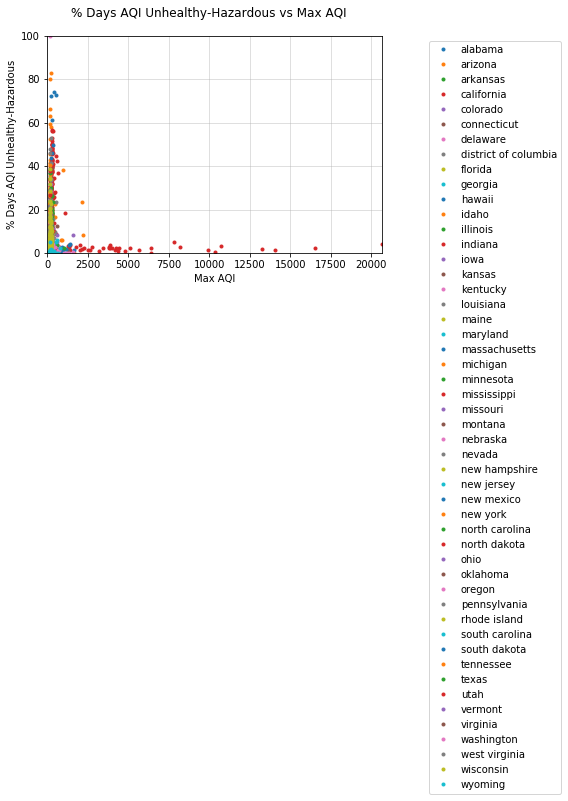

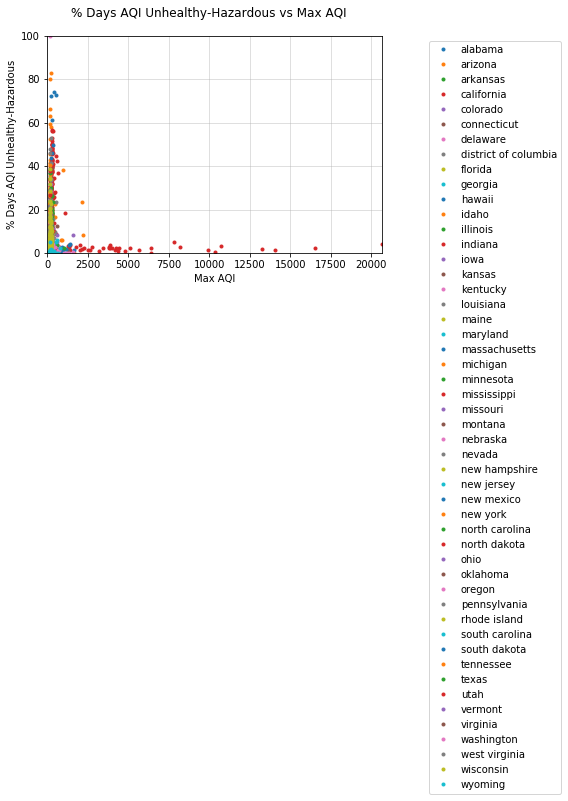

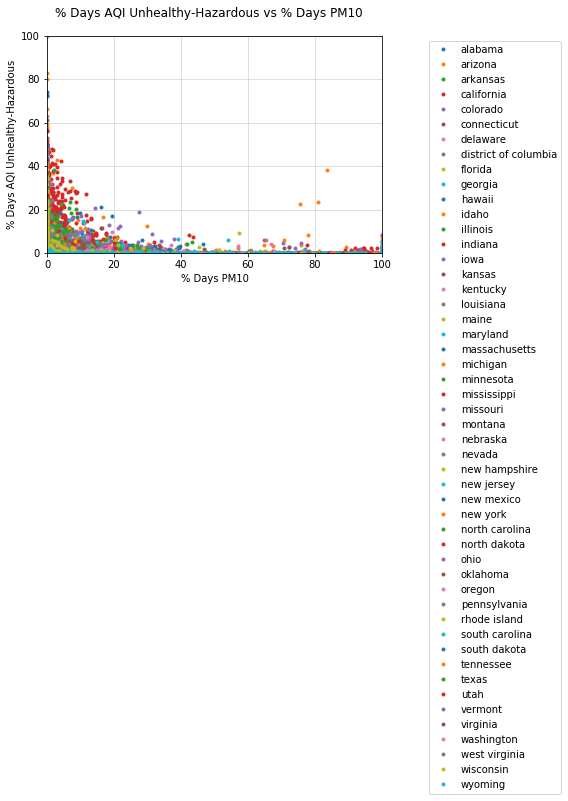

In [506]:
# fig, ax = plt.subplots()

a = make_scatterplot(aqi, group_by=['State'], 
                 y='% Days AQI Unhealthy-Hazardous', x='Max AQI', linestyle='', return_obj=True)

b = make_scatterplot(aqi, group_by=['State'], 
                 y='% Days AQI Unhealthy-Hazardous', x='Max AQI', linestyle='', return_obj=True)

c =make_scatterplot(aqi, group_by=['State'], 
                 y='% Days AQI Unhealthy-Hazardous', 
                 x='% Days PM10', linestyle='')

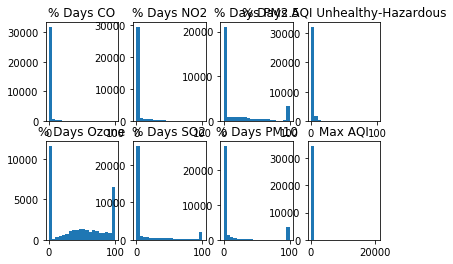

In [513]:
f, ax = plt.subplots(2,4)

ax[0,0].set_title('% Days CO')
ax[0,0].hist(aqi['% Days CO'], bins=20)

ax[1,0].set_title('% Days Ozone')
ax[1,0].hist(aqi['% Days Ozone'], bins=20)

ax[0,1].set_title('% Days NO2')
ax[0,1].hist(aqi['% Days NO2'], bins=20)

ax[1,1].set_title('% Days SO2')
ax[1,1].hist(aqi['% Days SO2'], bins=20)

ax[0,2].set_title('% Days PM2.5')
ax[0,2].hist(aqi['% Days PM2.5'], bins=20)

ax[1,2].set_title('% Days PM10')
ax[1,2].hist(aqi['% Days PM10'], bins=20)#, normed=True)

ax[0,3].set_title('% Days AQI Unhealthy-Hazardous')
ax[0,3].hist(aqi['% Days AQI Unhealthy-Hazardous'], bins=20)#, normed=True)

ax[1,3].set_title('Max AQI')
ax[1,3].hist(aqi['Max AQI'], bins=20)#, normed=True)

# f.suptitle('Histograms of Pollutant Data')
# plt.tight_layout()
# aqi['% Days Ozone'].hist(bins=20)
plt.show()

In [278]:
cancer.head()

,State,State Abbreviation,Year,Cancer Sites,Count
0,connecticut,CT,1999,All Invasive Cancer Sites Combined,18694
1,connecticut,CT,2000,All Invasive Cancer Sites Combined,19200
2,connecticut,CT,2001,All Invasive Cancer Sites Combined,19626
3,connecticut,CT,2002,All Invasive Cancer Sites Combined,19570
4,connecticut,CT,2003,All Invasive Cancer Sites Combined,19516


In [317]:
# Read in aggregated data
df = pd.read_csv('clean_data/DATA_meds.csv', index_col=0)
df = df[['State', 'State Abbreviation', 'Year', 'Cancer Sites', 'Count', 
         'Median % Days AQI Unhealthy-Hazardous', 'Median Max AQI', 'Median 90th Percentile AQI', 
         'Median % Days CO', 'Median % Days NO2', 'Median % Days SO2',
         'Median % Days Ozone', 'Median % Days PM2.5', 'Median % Days PM10']]
print("Combined data headers:\n", df.keys().tolist())
df.head()

Combined data headers:
 ['State', 'State Abbreviation', 'Year', 'Cancer Sites', 'Count', 'Median % Days AQI Unhealthy-Hazardous', 'Median Max AQI', 'Median 90th Percentile AQI', 'Median % Days CO', 'Median % Days NO2', 'Median % Days SO2', 'Median % Days Ozone', 'Median % Days PM2.5', 'Median % Days PM10']


,State,State Abbreviation,Year,Cancer Sites,Count,Median % Days AQI Unhealthy-Hazardous,Median Max AQI,Median 90th Percentile AQI,Median % Days CO,Median % Days NO2,Median % Days SO2,Median % Days Ozone,Median % Days PM2.5,Median % Days PM10
0,alabama,AL,1999,All Invasive Cancer Sites Combined,19290,1.725947,144.954545,89.909091,0.535731,0.0,11.765212,25.312181,40.137894,22.248982
1,alabama,AL,1999,Oral Cavity and Pharynx,489,1.725947,144.954545,89.909091,0.535731,0.0,11.765212,25.312181,40.137894,22.248982
2,alabama,AL,1999,Lip,67,1.725947,144.954545,89.909091,0.535731,0.0,11.765212,25.312181,40.137894,22.248982
3,alabama,AL,1999,Tongue,110,1.725947,144.954545,89.909091,0.535731,0.0,11.765212,25.312181,40.137894,22.248982
4,alabama,AL,1999,Salivary Gland,44,1.725947,144.954545,89.909091,0.535731,0.0,11.765212,25.312181,40.137894,22.248982


## Question 1: Is there a relationship between exposure to poor air quality and incidences of cancer?
- Visualization: scatterplots
    - X: % of days measured with AQI above “unhealthy”
    - Y: Cancer count
    - Groups:
        - State
        - Year 
        - Type of cancer
- Analysis: correlation

#### Group by type of cancer

In [318]:
# Remove summary data from df
cancer_type_df = df.loc[df['Cancer Sites'] != 'All Invasive Cancer Sites Combined']
print('Total number of different cancer sites in data:', len(cancer_type_df['Cancer Sites'].unique()))

# Find most prevalent cancers overall
# cancer_type_df.groupby(['Cancer Sites','State']).apply(lambda x: x.sort_values(['Count'], ascending=False))
top_cancers = cancer_type_df.groupby('Cancer Sites')[['Count']].sum().sort_values('Count', ascending=False)[:10].reset_index()
top_cancers = top_cancers['Cancer Sites'].tolist()
print('Top 10 most prevalent cancer sites:', ', '.join(top_cancers))

# Create df for scatterplot which contains only the most common cancers
top_cancer_type_df = cancer_type_df.loc[cancer_type_df['Cancer Sites'].isin(top_cancers)]
top_cancer_type_df.head()

Total number of different cancer sites in data: 103
Top 10 most prevalent cancer sites: Digestive System, Respiratory System, Male Genital System, Male and Female Breast, Female Breast, Lung and Bronchus, Prostate, Colon and Rectum, Urinary System, Colon excluding Rectum


,State,State Abbreviation,Year,Cancer Sites,Count,Median % Days AQI Unhealthy-Hazardous,Median Max AQI,Median 90th Percentile AQI,Median % Days CO,Median % Days NO2,Median % Days SO2,Median % Days Ozone,Median % Days PM2.5,Median % Days PM10
11,alabama,AL,1999,Digestive System,3738,1.725947,144.954545,89.909091,0.535731,0.0,11.765212,25.312181,40.137894,22.248982
15,alabama,AL,1999,Colon and Rectum,2249,1.725947,144.954545,89.909091,0.535731,0.0,11.765212,25.312181,40.137894,22.248982
16,alabama,AL,1999,Colon excluding Rectum,1644,1.725947,144.954545,89.909091,0.535731,0.0,11.765212,25.312181,40.137894,22.248982
35,alabama,AL,1999,Respiratory System,3613,1.725947,144.954545,89.909091,0.535731,0.0,11.765212,25.312181,40.137894,22.248982
38,alabama,AL,1999,Lung and Bronchus,3339,1.725947,144.954545,89.909091,0.535731,0.0,11.765212,25.312181,40.137894,22.248982


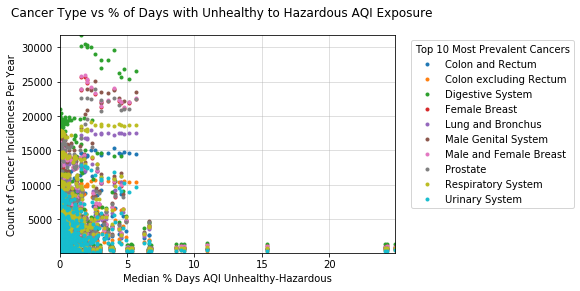

In [339]:
make_scatterplot(top_cancer_type_df, group_by=['Cancer Sites'], 
                 x='Median % Days AQI Unhealthy-Hazardous', y='Count', 
                 xlabel='Median % Days AQI Unhealthy-Hazardous', ylabel='Count of Cancer Incidences Per Year',
                 main_title='Cancer Type vs % of Days with Unhealthy to Hazardous AQI Exposure', 
                 legend_title='Top 10 Most Prevalent Cancers')

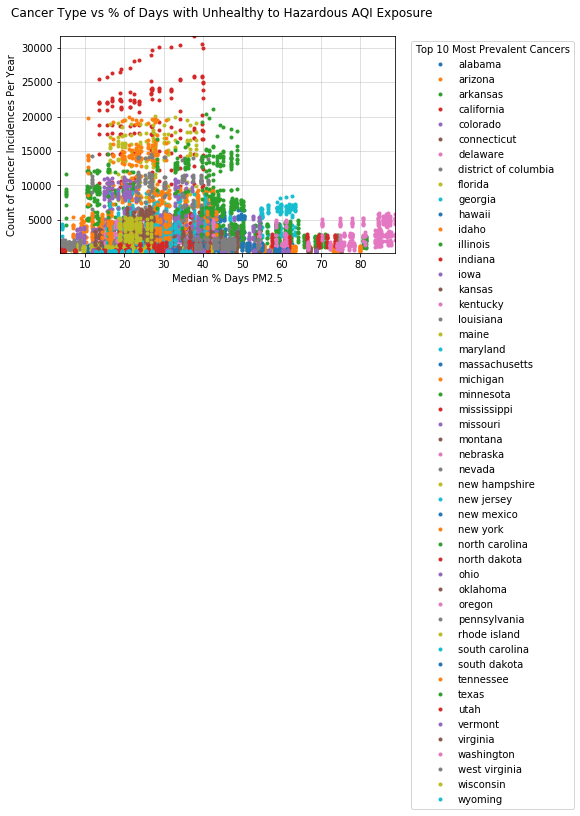

In [477]:
make_scatterplot(top_cancer_type_df, group_by=['State'], 
                 x='Median % Days PM2.5', y='Count', 
                 ylabel='Count of Cancer Incidences Per Year',
                 main_title='Cancer Type vs % of Days with Unhealthy to Hazardous AQI Exposure', 
                 legend_title='Top 10 Most Prevalent Cancers')

In [266]:
# df.groupby(['Cancer Sites', 'State', 'Year'])['Count','Median % Days AQI Unhealthy-Hazardous'].median().head()
#.reset_index()
# groups = df.groupby(['Cancer Sites'])['Count','Median % Days AQI Unhealthy-Hazardous']

# df.groupby(['Cancer Sites', 'State', 'Year'])['Count','Median % Days AQI Unhealthy-Hazardous'].median()#.reset_index()

# df.groupby(['Cancer Sites', 'Year', 'State'])[['Count']].mean().head()
df.groupby(['Cancer Sites','Median % Days AQI Unhealthy-Hazardous'])[['Count']].mean().head()

Count
Cancer Sites               Median % Days AQI Unhealthy-Hazardous            
Acute Lymphocytic Leukemia 0.000000                                49.754386
                           0.006088                               151.000000
                           0.007210                               306.000000
                           0.007828                               306.000000
                           0.008102                               100.000000

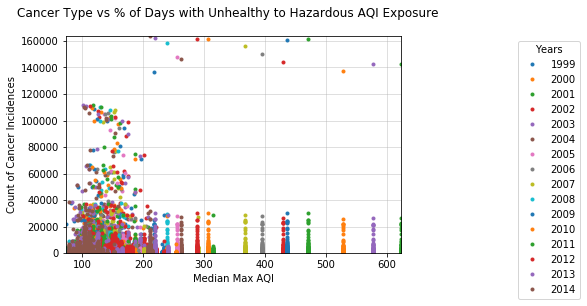

In [321]:
make_scatterplot(df, group_by=['Year'], 
                 x='Median Max AQI',
                 y='Count', ylabel='Count of Cancer Incidences',
                 main_title='Cancer Type vs % of Days with Unhealthy to Hazardous AQI Exposure', 
                 legend_title='Years')

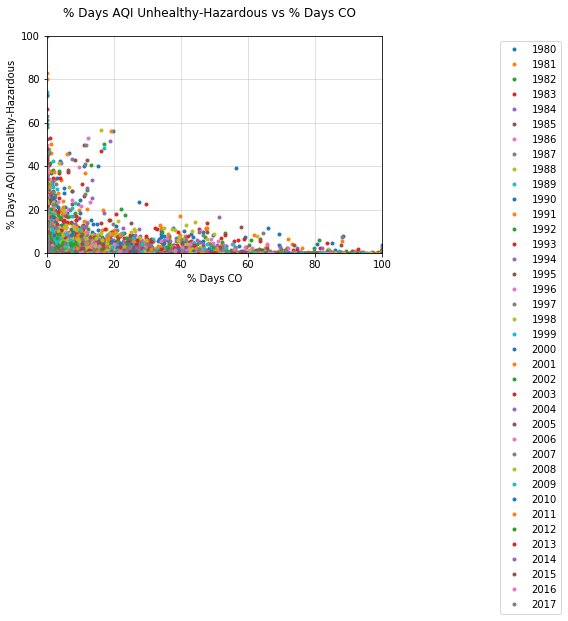

In [315]:
make_scatterplot(aqi, group_by=['Year'], x='% Days CO', y='% Days AQI Unhealthy-Hazardous', linestyle='')

#                  main_title='Cancer Type vs % of Days with Unhealthy to Hazardous AQI Exposure', 
#                  legend_title='Years')

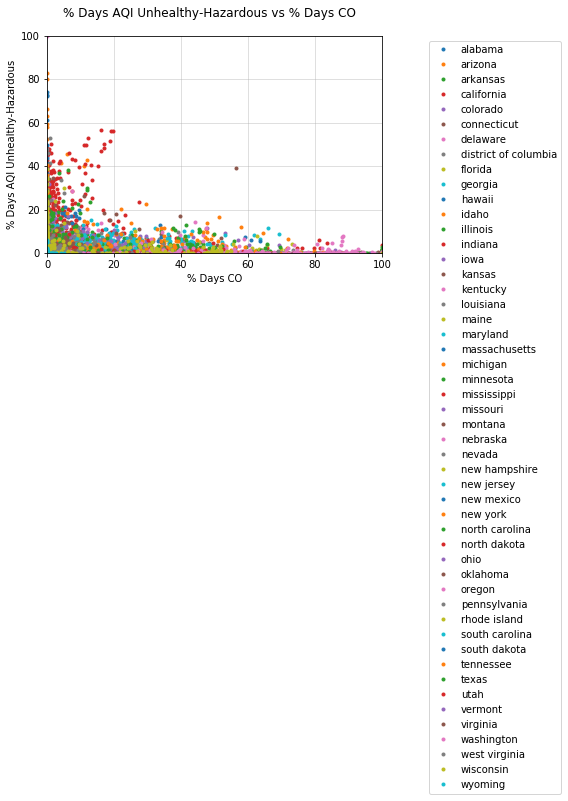

In [458]:
make_scatterplot(aqi, group_by=['State'], x='% Days CO', y='% Days AQI Unhealthy-Hazardous', linestyle='')

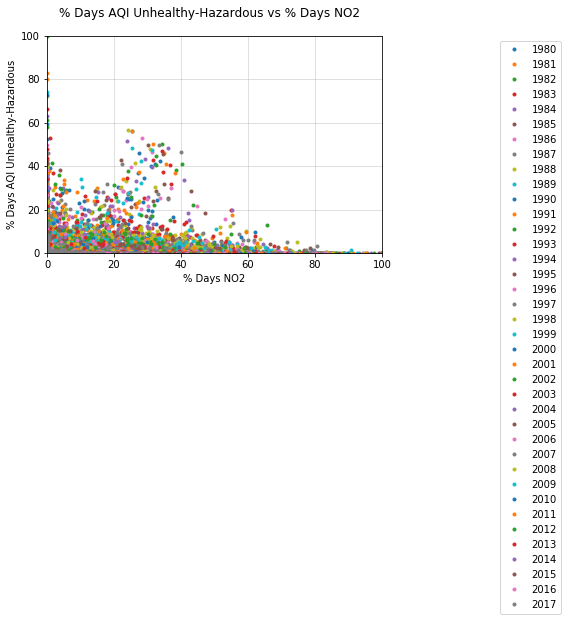

In [457]:
make_scatterplot(aqi, group_by=['Year'], x='% Days NO2', y='% Days AQI Unhealthy-Hazardous', linestyle='')

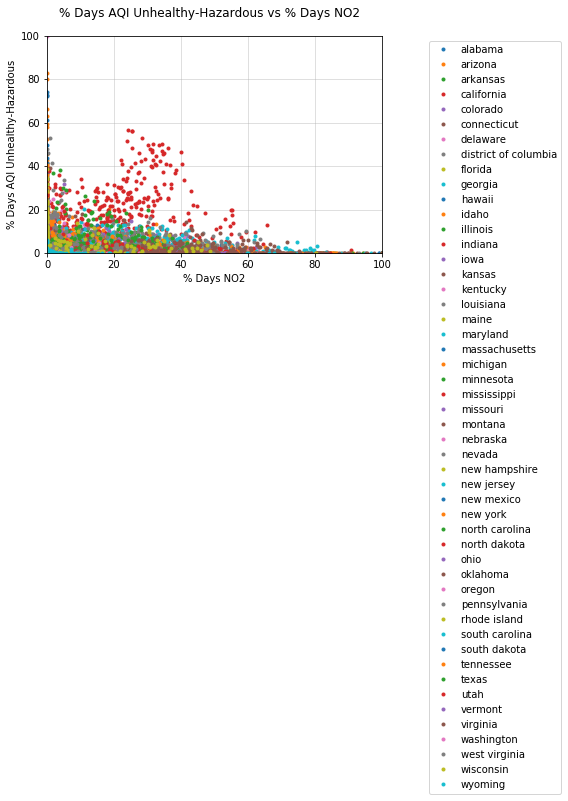

In [460]:
make_scatterplot(aqi, group_by=['State'], x='% Days NO2', y='% Days AQI Unhealthy-Hazardous', linestyle='')

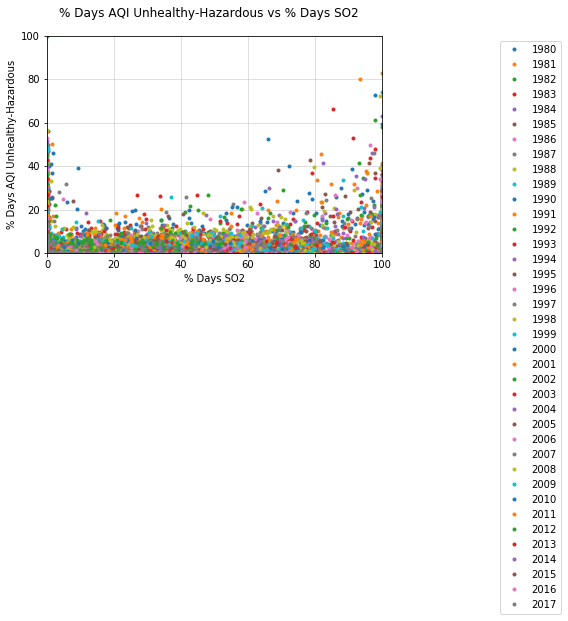

In [461]:
make_scatterplot(aqi, group_by=['Year'], x='% Days SO2', y='% Days AQI Unhealthy-Hazardous', linestyle='')

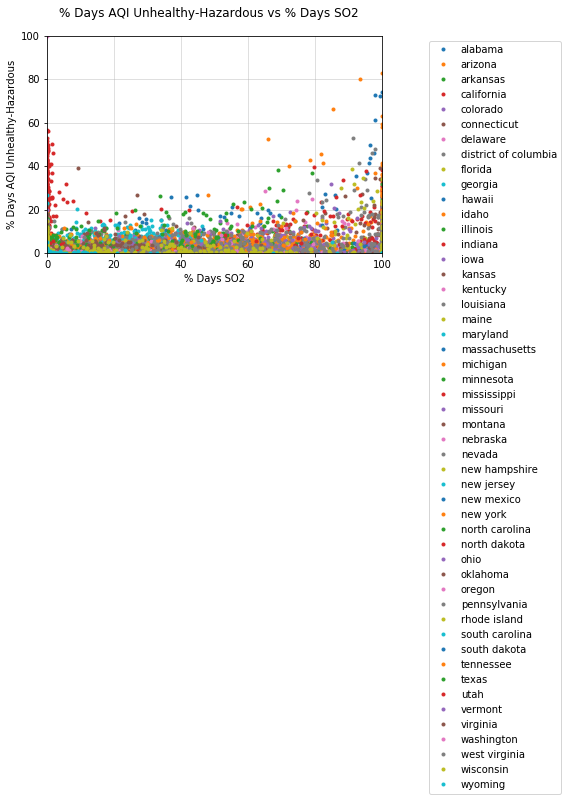

In [462]:
make_scatterplot(aqi, group_by=['State'], x='% Days SO2', y='% Days AQI Unhealthy-Hazardous', linestyle='')

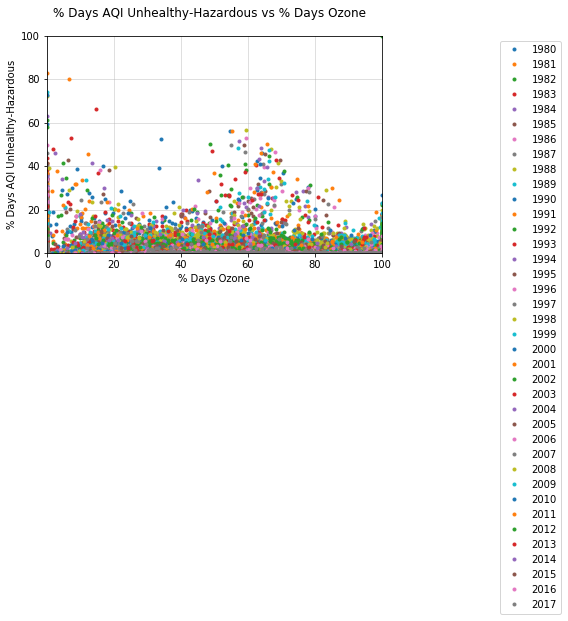

In [454]:
make_scatterplot(aqi, group_by=['Year'], x='% Days Ozone', y='% Days AQI Unhealthy-Hazardous', linestyle='')

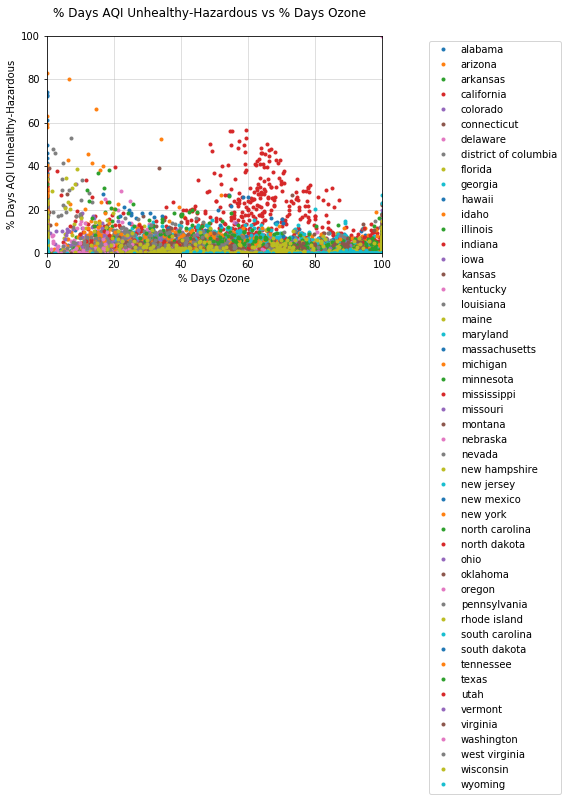

In [465]:
make_scatterplot(aqi, group_by=['State'], x='% Days Ozone', y='% Days AQI Unhealthy-Hazardous', linestyle='')

## Question 2: Does your probability of developing a certain type of cancer change depending on your geographic location in the US?
------------
- Data: State_cancer_1998_2014.csv 

- Data Analysis: Chi square (discrete categorical variables)
    - Incidences of each type of cancer & Location (state/county/cbsa) 
        - Null hypothesis: type of cancer unrelated to geographic location / probability of developing a certain type of cancer unrelated to geo location → can be done for each year separately to see how this changes
    - AQI category (# days of each?) & Location (state/county/cbsa)
        - Null hypothesis: proportions of [aqi category] days the same for each geographic location (homogeneity test)

- Visualization: choropleth showing most prevalent type of cancer in each [state/county/cbsa] for each year (?)

In [ ]:
cancertypes = cancer.loc[cancer['Cancer Sites'] != 'All Invasive Cancer Sites Combined'].reset_index()
for name, group in cancertypes.groupby(['Year', 'State Abbreviation', 'Cancer Sites']):
    print(name)
    print(group.Count)

In [ ]:
from scipy.stats import chisquare

In [269]:
state_cancer = pd.read_csv('clean_data/state_cancer_1998_2014.csv', index_col=0)
# state_cancer.head()
state_cancer_type = state_cancer.loc[state_cancer['Cancer Sites'] != 'All Invasive Cancer Sites Combined']
# state_cancer_type = state_cancer_type.groupby(['State Abbreviation', 'Year', 'Cancer Sites'])[['Count']].max().reset_index()
# state_cancer_type = state_cancer_type.groupby(['State Abbreviation', 'Year', 'Cancer Sites'])[['Count']].max().sort_values(['Year','Count'], ascending=False)#.groupby('State')

# Get rid of summary data
state_cancer_type = state_cancer.loc[state_cancer['Cancer Sites'] != 'All Invasive Cancer Sites Combined']

# Group by state, year, and cancer type
state_cancer_type = state_cancer_type.groupby(['State Abbreviation', 'Year', 'Cancer Sites'])[['Count']].sum().reset_index()

# All ranked by descending count
state_cancer_type = state_cancer_type.sort_values('Count', ascending=False).reset_index()

state_cancer_type = state_cancer_type.groupby(['State Abbreviation', 'Year', ])[['Cancer Sites','Count']].max().reset_index()

# state_cancer_type

state_cancer_type.head()

,State Abbreviation,Year,Cancer Sites,Count
0,AK,1999,Urinary System,362
1,AK,2000,Urinary System,395
2,AK,2001,Urinary System,416
3,AK,2002,Urinary System,422
4,AK,2003,Urinary System,412


## Question 3: How well can you predict [cancer instances/risk] from AQI and year?
--------
- Data Analysis: Linear Regression
    - Response variable: cancer (rate?)
    - Explanatory variables: AQI, state, county, year

In [431]:
import statsmodels.regression.linear_model as sm
# class statsmodels.regression.linear_model.OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)[source]
# A simple ordinary least squares model.

# Parameters:	
# endog (array-like) – 1-d endogenous response variable. The dependent variable.
# exog (array-like) – A nobs x k array where nobs is the number of observations 
#                     and k is the number of regressors. An intercept is not included 
#                     by default and should be added by the user. 
#                     See statsmodels.tools.add_constant.
# missing (str) – Available options are ‘none’, ‘drop’, and ‘raise’. If ‘none’, no nan checking is done. 
#                 If ‘drop’, any observations with nans are dropped. If ‘raise’, an error is raised. Default is ‘none.’
# hasconst (None or bool) – Indicates whether the RHS includes a user-supplied constant. 
#                           If True, a constant is not checked for and k_constant is set to 1 and all result statistics are calculated as if a constant is present. If False, a constant is not checked for and k_constant is set to 0.
# weights
# scalar – Has an attribute weights = array(1.0) due to inheritance from WLS.

Y = df['Count']#.tolist()
X = range(len(Y))
X = sm.add_constant(X) # include intercept

model = sm.OLS(Y,X)
results = model.fit()
results.params
results.tvalues
print(results.t_test([1, 0]))
print(results.f_test(np.identity(2)))
print('\n\n')
print(results.summary())


                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0          1322.9067     38.733     34.155      0.000    1246.991    1398.823
<F test: F=array([[1794.63437947]]), p=0.0, df_denom=66758, df_num=2>



                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     24.68
Date:                Wed, 13 Jun 2018   Prob (F-statistic):           6.78e-07
Time:                        09:16:33   Log-Likelihood:            -6.6339e+05
No. Observations:               66760   AIC:                         1.327e+06
Df Residuals:                   66758   BIC:              